## Import Libraries

In [36]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import time
import numpy as np
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [37]:
data = pd.read_csv('data/uci-secom.csv')

In [38]:
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [39]:
data.shape

(1567, 592)

In [40]:
data.fillna(0, inplace = True)

In [41]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3002.910638,2484.700932,2180.887035,1383.901023,4.159516,99.106573,100.209538,0.121122,1.460995,-0.000840,...,38.623767,0.499777,0.015308,0.003844,3.065869,0.021445,0.016464,0.005280,99.606461,-0.867262
std,200.204648,184.815753,209.206773,458.937272,56.104457,9.412812,11.363940,0.012831,0.090461,0.015107,...,72.871466,0.013084,0.017179,0.003721,3.577730,0.012366,0.008815,0.002869,93.895701,0.498010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.053400,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.016900,0.000000,0.000000,0.000000,-1.000000
25%,2965.670000,2451.515000,2180.700000,1080.116050,1.011000,100.000000,97.762200,0.121100,1.410950,-0.010800,...,0.000000,0.497900,0.011600,0.003100,2.306200,0.013400,0.010600,0.003300,44.368600,-1.000000
50%,3010.920000,2498.910000,2200.955600,1283.436800,1.310100,100.000000,101.492200,0.122400,1.461500,-0.001300,...,0.000000,0.500200,0.013800,0.003600,2.757600,0.020500,0.014800,0.004600,71.778000,-1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.518800,100.000000,104.530000,0.123800,1.516850,0.008400,...,57.449750,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.000000,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [42]:
data.isnull().sum()

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 592, dtype: int64

In [43]:
#feature variables
X = data.drop(['Time','Pass/Fail'], axis=1).values
X

array([[3.0309300e+03, 2.5640000e+03, 2.1877333e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.0957800e+03, 2.4651400e+03, 2.2304222e+03, ..., 2.0100000e-02,
        6.0000000e-03, 2.0820450e+02],
       [2.9326100e+03, 2.5599400e+03, 2.1864111e+03, ..., 4.8400000e-02,
        1.4800000e-02, 8.2860200e+01],
       ...,
       [2.9788100e+03, 2.3797800e+03, 2.2063000e+03, ..., 8.6000000e-03,
        2.5000000e-03, 4.3523100e+01],
       [2.8949200e+03, 2.5320100e+03, 2.1770333e+03, ..., 2.4500000e-02,
        7.5000000e-03, 9.3494100e+01],
       [2.9449200e+03, 2.4507600e+03, 2.1954444e+03, ..., 1.6200000e-02,
        4.5000000e-03, 1.3778440e+02]])

In [9]:
#target variable
y = data['Pass/Fail'].values
y

array([-1, -1,  1, ..., -1, -1, -1], dtype=int64)

In [10]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 23)

In [12]:
print("Shape of X_train:", X.shape)
print("Shape of y_train:", y.shape)

Shape of X_train: (1567, 590)
Shape of y_train: (1567,)


In [13]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
LogisticRegression()
y_pred = lr.predict(X_test)

C:\Users\syedi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_pred, y_test)

0.8630573248407644

In [16]:
# error rate
def error_rate(xtrain, ytrain, x, opts):
    # parameters
    fold = opts['fold']
    xt = fold['xt']
    yt = fold['yt']
    xv = fold['xv']
    yv = fold['yv']
    # number of instances
    num_train = np.size(xt, 0)
    num_valid = np.size(xv, 0)
    # Define selected features
    xtrain = xt[:, x == 1]
    ytrain = yt.reshape(num_train)
    xvalid = xv[:, x == 1]
    yvalid = yv.reshape(num_valid)
    # Training
    mdl     = LinearRegression()
    mdl.fit(xtrain, ytrain)
    # Prediction
    ypred   = mdl.predict(xvalid)
    error   = mean_squared_error(yvalid, ypred, squared=False)
    
    return error

In [17]:
# Error rate & Feature size
def Fun(xtrain, ytrain, x, opts):
    # parameters
    alpha = 0.99
    beta = 1 - alpha
    # original feature size
    max_feat = len(x)
    # Number of selected features
    num_feat = np.sum(x == 1)
    # Solve if no feature selected
    if num_feat == 0:
        cost = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x, opts)
        # Objective function
        cost = alpha * error + beta * (num_feat / max_feat)
        
    return cost

In [18]:
def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * random.random()        
    
    return X

In [19]:
def init_velocity(lb, ub, N, dim):
    V    = np.zeros([N, dim], dtype='float')
    Vmax = np.zeros([1, dim], dtype='float')
    Vmin = np.zeros([1, dim], dtype='float')
    # Maximum & minimum velocity
    for d in range(dim):
        Vmax[0,d] = (ub[0,d] - lb[0,d]) / 2
        Vmin[0,d] = -Vmax[0,d]
        
    for i in range(N):
        for d in range(dim):
            V[i,d] = Vmin[0,d] + (Vmax[0,d] - Vmin[0,d]) * random.random()
        
    return V, Vmax, Vmin

In [20]:
def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin

In [21]:
def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x

In [22]:
def jfs(xtrain, ytrain, opts):
    # Parameters
    ub    = 1
    lb    = 0
    thres = 0.5
    w     = 0.9    # inertia weight
    c1    = 2      # acceleration factor
    c2    = 2      # acceleration factor
    
    N        = opts['N']
    max_iter = opts['T']
    if 'w' in opts:
        w    = opts['w']
    if 'c1' in opts:
        c1   = opts['c1']
    if 'c2' in opts:
        c2   = opts['c2'] 
    
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position & velocity
    X             = init_position(lb, ub, N, dim)
    V, Vmax, Vmin = init_velocity(lb, ub, N, dim) 
    
    # Pre
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')
    Xpb   = np.zeros([N, dim], dtype='float')
    fitP  = float('inf') * np.ones([N, 1], dtype='float')
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    
    while t < max_iter:
        # Binary conversion
        Xbin = binary_conversion(X, thres, N, dim)
        
        # Fitness
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts)
            if fit[i,0] < fitP[i,0]:
                Xpb[i,:]  = X[i,:]
                fitP[i,0] = fit[i,0]
            if fitP[i,0] < fitG:
                Xgb[0,:]  = Xpb[i,:]
                fitG      = fitP[i,0]
        
        # Store result
        curve[0,t] = fitG.copy()
        print("Iteration:", t + 1)
        print("Best (PSO):", curve[0,t])
        t += 1
        
        for i in range(N):
            for d in range(dim):
                # Update velocity
                r1     = random.random()
                r2     = random.random()
                V[i,d] = w * V[i,d] + c1 * r1 * (Xpb[i,d] - X[i,d]) + c2 * r2 * (Xgb[0,d] - X[i,d]) 
                # Boundary
                V[i,d] = boundary(V[i,d], Vmin[0,d], Vmax[0,d])
                # Update position
                X[i,d] = X[i,d] + V[i,d]
                # Boundary
                X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
    
                
    # Best feature subset
    Gbin       = binary_conversion(Xgb, thres, 1, dim) 
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))    
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    pso_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    return pso_data

In [23]:
#fmdl

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 23)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

In [25]:
c1  = 2         # cognitive factor
c2  = 2         # social factor 
w   = 0.9       # inertia weight
k     = 5     # k-value in KNN
N     = 20    # number of population
T     = 100   # maximum number of iterations
opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'w':w, 'c1':c1, 'c2':c2}

Iteration: 1
Best (PSO): 0.6579612405682007
Iteration: 2
Best (PSO): 0.5743086558662489
Iteration: 3
Best (PSO): 0.5743086558662489
Iteration: 4
Best (PSO): 0.5743086558662489
Iteration: 5
Best (PSO): 0.5743086558662489
Iteration: 6
Best (PSO): 0.5450376182204434
Iteration: 7
Best (PSO): 0.5384636496974945
Iteration: 8
Best (PSO): 0.5384636496974945
Iteration: 9
Best (PSO): 0.5384636496974945
Iteration: 10
Best (PSO): 0.5384636496974945
Iteration: 11
Best (PSO): 0.5287096625379633
Iteration: 12
Best (PSO): 0.5287096625379633
Iteration: 13
Best (PSO): 0.5287096625379633
Iteration: 14
Best (PSO): 0.5287096625379633
Iteration: 15
Best (PSO): 0.5287096625379633
Iteration: 16
Best (PSO): 0.5287096625379633
Iteration: 17
Best (PSO): 0.5287096625379633
Iteration: 18
Best (PSO): 0.5287096625379633
Iteration: 19
Best (PSO): 0.5188576560920218
Iteration: 20
Best (PSO): 0.5188576560920218
Iteration: 21
Best (PSO): 0.5188576560920218
Iteration: 22
Best (PSO): 0.5188576560920218
Iteration: 23
Best 

C:\Users\syedi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


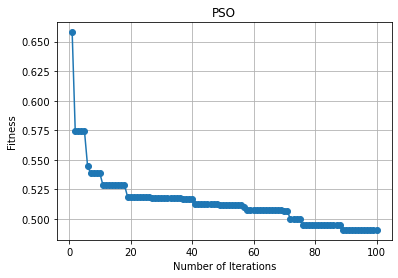

In [26]:
# perform feature selection
start_time = time.time()
fmdl  = jfs(X_train, y_train, opts)
print("Run Time --- %s seconds ---" % (time.time() - start_time))

sf    = fmdl['sf']

# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

mdl       = LogisticRegression()
mdl.fit(x_train, y_train)

# accuracy
y_pred    = mdl.predict(x_valid)
RMSE       = mean_squared_error(y_valid, y_pred, squared=False)
print("RMSE:", RMSE)

# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('PSO')
ax.grid()
plt.show()

In [27]:
fmdl['sf']

array([  2,   4,   6,   7,   9,  10,  15,  16,  18,  29,  30,  31,  34,
        36,  38,  40,  46,  47,  48,  49,  51,  53,  54,  57,  59,  60,
        62,  64,  65,  67,  68,  69,  71,  73,  75,  76,  77,  78,  79,
        80,  81,  83,  84,  85,  90,  91,  93,  95,  96,  98, 101, 102,
       104, 105, 109, 110, 111, 112, 116, 124, 125, 129, 130, 131, 136,
       137, 138, 139, 141, 142, 143, 144, 146, 147, 148, 151, 152, 153,
       155, 159, 160, 163, 164, 165, 169, 170, 172, 173, 179, 182, 183,
       190, 191, 192, 197, 198, 199, 201, 210, 214, 216, 218, 219, 221,
       224, 226, 227, 228, 229, 230, 233, 234, 235, 236, 238, 239, 240,
       241, 242, 243, 248, 251, 254, 255, 256, 257, 259, 260, 262, 265,
       266, 267, 269, 274, 280, 281, 283, 285, 287, 288, 291, 298, 302,
       305, 307, 311, 313, 317, 318, 324, 325, 328, 333, 335, 336, 337,
       338, 339, 342, 345, 346, 348, 350, 354, 355, 357, 360, 363, 364,
       367, 368, 369, 370, 372, 374, 375, 379, 381, 386, 388, 38

In [44]:
#feature variables
X = data.drop(['Time','Pass/Fail'], axis=1)

#target variable
y = data['Pass/Fail']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 23)

In [45]:
#X_test = X_test.drop(['default.payment.next.month'], axis=1).iloc[:,fmdl['sf']]
data = data.drop(['Time'], axis=1)
new_data = data.iloc[:,fmdl['sf']]

In [46]:
new_data

,2,4,6,7,9,10,15,16,18,29,...,566,569,571,572,577,578,580,581,583,584
0,2187.7333,1.3602,97.6133,0.1242,0.0162,-0.0034,414.8710,10.0433,192.3963,2.0222,...,0.0000,0.0000,2.1113,8.95,14.9509,0.0000,0.0000,0.0000,0.0118,0.0035
1,2230.4222,0.8294,102.3433,0.1247,-0.0005,-0.0148,414.7347,9.2599,191.2872,2.2667,...,0.0000,0.0000,2.4335,5.92,10.9003,0.0096,0.0060,208.2045,0.0223,0.0055
2,2186.4111,1.5102,95.4878,0.1241,0.0041,0.0013,416.7075,9.3144,192.7035,2.3333,...,0.4122,68.8489,2.0293,11.21,9.2721,0.0584,0.0148,82.8602,0.0157,0.0039
3,2199.0333,1.3204,104.2367,0.1217,-0.0124,-0.0033,422.2894,9.6924,192.1557,2.6444,...,3.5611,25.0363,2.0253,9.33,8.5831,0.0202,0.0044,73.8432,0.0103,0.0025
4,2233.3667,1.5334,100.3967,0.1235,-0.0031,-0.0072,420.5925,10.3387,191.6037,3.1556,...,0.0000,0.0000,2.0275,8.83,10.9698,0.0000,0.0000,0.0000,0.4766,0.1045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2179.7333,1.4843,82.2467,0.1248,-0.0045,-0.0057,419.3404,10.2397,193.7470,2.2222,...,2.0902,15.4662,2.0153,7.98,11.7256,0.0068,0.0047,203.1720,0.0143,0.0039
1563,2198.5667,0.8763,98.4689,0.1205,-0.0061,-0.0093,405.8178,10.2285,193.7889,2.0000,...,1.7420,20.9118,2.1814,5.48,17.8379,0.0000,0.0000,0.0000,0.0131,0.0036
1564,2206.3000,0.8236,99.4122,0.1208,0.0000,0.0000,0.0000,0.0000,0.0000,2.2333,...,4.4128,29.0954,2.3435,6.49,17.7267,0.0197,0.0025,43.5231,0.0153,0.0041
1565,2177.0333,1.5726,98.7978,0.1213,-0.0072,0.0032,401.9153,9.8630,187.3818,2.9667,...,2.0902,15.4662,1.9098,9.13,19.2104,0.0262,0.0075,93.4941,0.0178,0.0038


In [47]:
#feature variables
X = new_data.values
X

#target variable
y = data['Pass/Fail'].values
y

sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 23)

print("Shape of X_train:", X.shape)
print("Shape of y_train:", y.shape)

lr = LogisticRegression()
lr.fit(X_train, y_train)
LogisticRegression()
y_pred = lr.predict(X_test)

accuracy_score(y_pred, y_test)

Shape of X_train: (1567, 264)
Shape of y_train: (1567,)


C:\Users\syedi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9140127388535032